<a href="https://colab.research.google.com/github/mbuitragoc/MetNumUN2023I/blob/main/Lab10/mbuitragocAlgorithmicToolboxWeek3SolvingNonLinearAlgebraicEquations_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$.

In [2]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.

    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy.
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.

    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    x = x0
    for niter in range(maxiter):
      fx = f(x)
      if abs(fx) < eps:
        return x, niter
      fderx = fder(x)
      if fderx == 0:
        raise RuntimeError('Zero derivative. No solution found')
      x = x - fx/fderx
    else:
      raise RuntimeError('Exceeded maximum iterations.')

### Test I.1

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [5]:
# ... ENTER YOUR CODE HERE ...
import sympy as sp

x = sp.symbols('x')
f = x**2 - 1
roots = sp.solve(f,x)
print('Actual roots: ', roots)

def f(x):
  return x**2 -1

def df(x):
  return 2*x

x0 = 2.0
x, niter = newton_iteration(f,df,x0)

print('Computed root: ', x)
print('Number of iterations: ', niter)

Actual roots:  [-1, 1]
Computed root:  1.0000000464611474
Number of iterations:  4


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [7]:
# ... ENTER YOUR CODE HERE ...
def modified_newton_iteration(f, fder, x0, m=1, eps=1e-15, maxiter=1000):
  x = x0
  for niter in range(maxiter):
    fx = f(x)
    if abs(fx) < eps:
      return x,niter
    fderx = fder(x)
    if fderx == 0:
      raise RuntimeError('Zero derivative. No solution found')
    x = x - m * fx/fderx
  else:
    raise RuntimeError('Exceeded maximum iterations.')

In [8]:
def f(x):
  return (x**2 - 1)**2

def df(x):
  return 4*x*(x**2 - 1)

x0 = 2.0
for m in range(1,6):
  x, niter = modified_newton_iteration(f,df,x0,m=m)
  print('m = ',m,' Computed root:',x,' Number of iterations:',niter)

m =  1  Computed root: 1.000000015292419  Number of iterations: 27
m =  2  Computed root: 1.000000000000001  Number of iterations: 5
m =  3  Computed root: 0.9999999916359696  Number of iterations: 25


RuntimeError: ignored

Este resultado se alinea con las expectativas.

Para m = 1 y m = 3, el número de iteraciones es significativamente mayor. Estos valores no coinciden con la multiplicidad de la raíz (que es 2 en este caso), por lo que esperamos una convergencia lineal más lenta.

Para m = 2, que coincide con la multiplicidad de la raíz, vemos la convergencia más rápida (en 5 iteraciones), lo que confirma que cuando m es igual a la multiplicidad de la raíz, el método de Newton tiene convergencia cuadrática.

Para m = 4 y m = 5, las iteraciones no convergen dentro del número máximo de iteraciones especificado, lo que genera un RuntimeError. Esto se debe a que cuando m es mayor que la multiplicidad de la raíz, el método puede divergir en lugar de converger.

Esto confirma la afirmación de que el método de Newton tiene convergencia cuadrática cuando m es igual a la multiplicidad de la raíz y convergencia lineal en caso contrario. De hecho, si m es mayor que la multiplicidad de la raíz, el método puede no converger en absoluto.

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

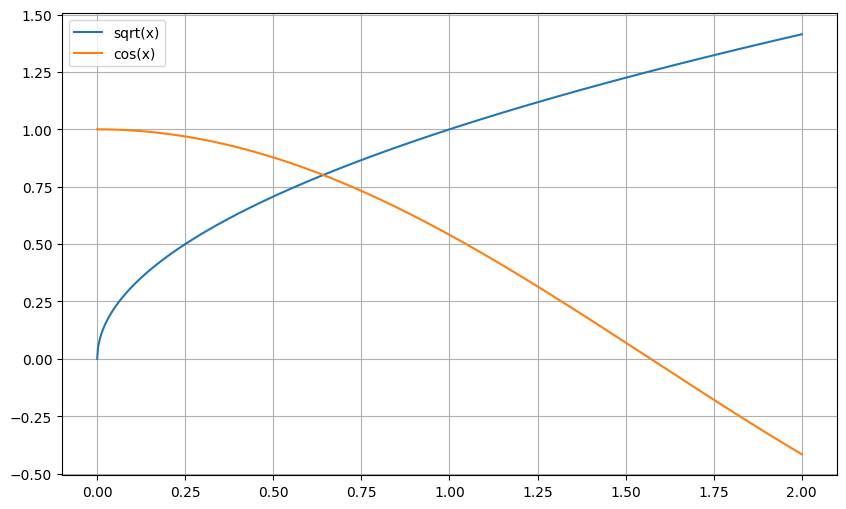

In [13]:
# ... ENTER YOUR CODE HERE ...
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2,1000)
y1 = np.sqrt(x)
y2 = np.cos(x)

plt.figure(figsize =(10,6))
plt.plot(x,y1,label='sqrt(x)')
plt.plot(x,y2,label='cos(x)')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
def fixed_point_iteration(f,x0,eps=1e-5,maxiter=1000):
  x = x0
  for ntier in range(maxiter):
    x_new = x  - f(x)
    if abs(x_new - x) < eps:
      return x_new, niter
    x = x_new
  else:
    raise RuntimeError('Exceeded maximum iterations.')

def f(x):
  return np.sqrt(x) - np.cos(x)

x0 = 0.6
x_no_alpha, niter = fixed_point_iteration( f,x0)
print('Computed root:', x_no_alpha, 'Number of iterations:', niter)

Computed root: 0.6417154785546847 Number of iterations: 6


In [20]:
def fixed_point_iteration_alpha(f,x0,alpha=1.0,eps=1e-5,maxiter=1000):
  x = x0
  for niter in range(maxiter):
    x_new = x - alpha * f(x)
    if abs(x_new - x) < eps:
      return x_new, niter
    x = x_new
  else:
    raise RuntimeError('Exceeded maximum iterations.')

Optimal alpha: 0.8144498702103842
Computed root: 0.641714364092797 Number of iterations: 2


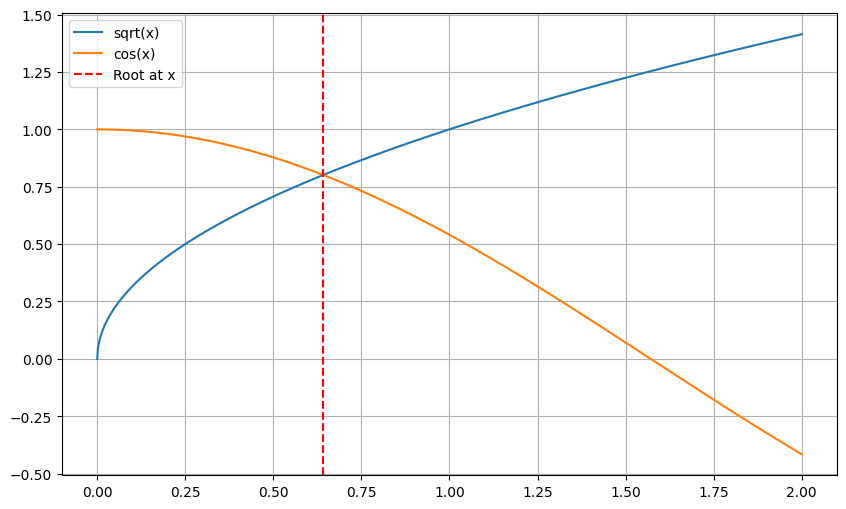

In [28]:
def f(x):
  return np.sqrt(x) - np.cos(x)

def df(x):
  return 0.5/ np.sqrt(x) + np.sin(x)

x_values = np.linspace(0.4,0.8,500)
df_values = df(x_values)
m = np.min(np.abs(df_values))
M = np.max(np.abs(df_values))

alpha_optimal = 2 / ( m + M)
print(f"Optimal alpha: {alpha_optimal}")

x0 = 0.6
x, niter = fixed_point_iteration_alpha(f,x0,alpha=alpha_optimal)
print('Computed root:', x, 'Number of iterations:', niter)
plt.figure(figsize =(10,6))
z = np.linspace(0,2,1000)
plt.plot(z,y1,label='sqrt(x)')
plt.plot(z,y2,label='cos(x)')
plt.axvline(x, color='r',linestyle='--',label='Root at x')
plt.legend()
plt.grid(True)
plt.show()

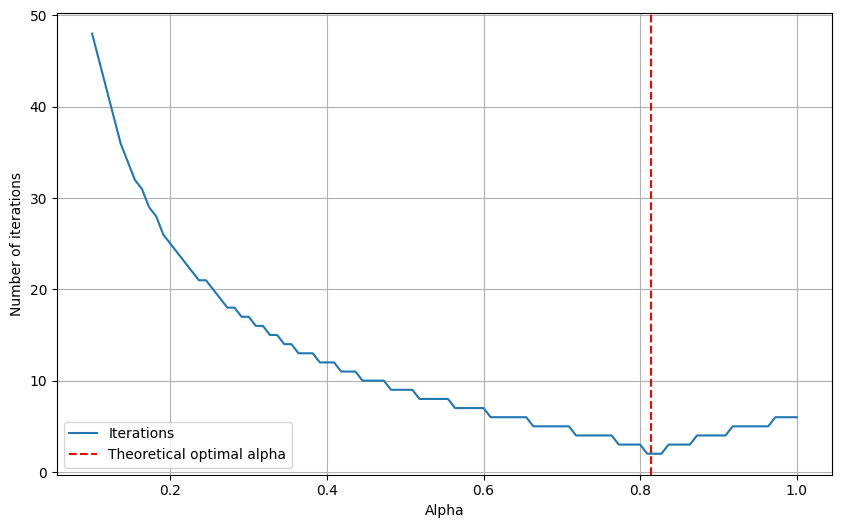

In [25]:
alphas = np.linspace(0.1, 1, 100)
iterations = []

for alpha in alphas:
    _, niter = fixed_point_iteration_alpha(f, x0, alpha, eps=1e-5)
    iterations.append(niter)

plt.figure(figsize=(10, 6))
plt.plot(alphas, iterations, label='Iterations')
plt.axvline(alpha_optimal, color='r', linestyle='--', label='Theoretical optimal alpha')
plt.xlabel('Alpha')
plt.ylabel('Number of iterations')
plt.legend()
plt.grid(True)
plt.show()

# Part III. Newton's fractal.

(Not graded).

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points.
Color the grid in three colors, according to the root, to which iterations converged.

In [29]:
def f(z):
  return z**3-1

def df(z):
  return 3*z**2

def complex_newton(d,df,z0,eps=1e-5,maxiter=1000):
  z = z0
  for i in range(maxiter):
    z_new = z - f(z) / df(z)
    if abs(z_new - z) < eps:
      return z_new
    z = z_new
  else:
    raise RuntimeError('Exceeded maximum iterations')

In [31]:
re_values = np.linspace(-1.5,1.5,400)
im_values = np.linspace(-1.5,1.5,400)

roots = np.zeros((len(re_values),len(im_values)),dtype=int)
for i, re in enumerate(re_values):
  for j, im in enumerate(im_values):
    z0 = re + im*1j
    root = complex_newton(f,df,z0)
    roots[i,j] = np.argmin(abs(root - np.exp(1j * 2 * np.pi * np.arange(3)/3)))


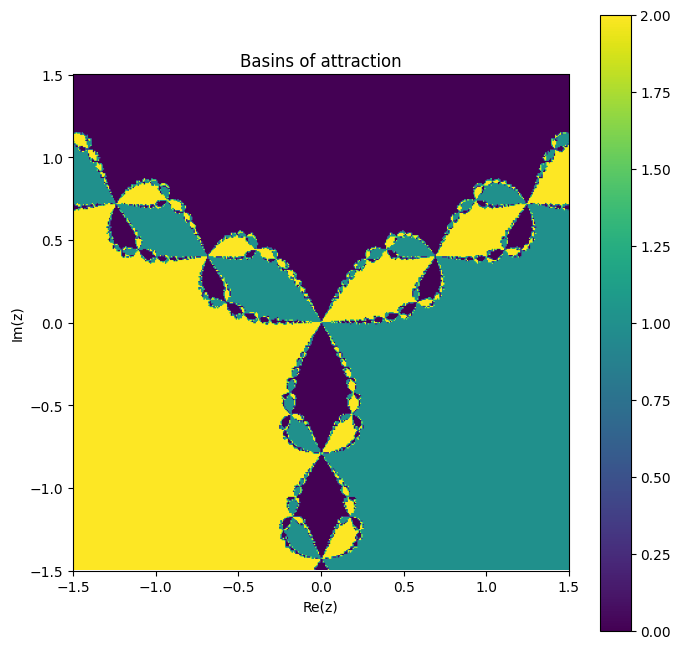

In [32]:
plt.figure(figsize=(8, 8))
plt.imshow(roots, extent=(-1.5, 1.5, -1.5, 1.5), origin='lower')
plt.colorbar()
plt.title('Basins of attraction')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()